Install PySpark

In [ ]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=f989e3979052045d49c631d15f3bddc672cd93f234155a37c17ec4b04fbc7ab1
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Create a spark session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Udemy").getOrCreate()


Read Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Big Data/Course_info.csv"

courses = spark.read.format("csv").option("header", True).option("encoding", "UTF-8").load(file_path)

courses.show()


+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+---------------+--------+--------------------+--------------------+--------------------+
|    id|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|          topic|language|          course_url|     instructor_name|      instructor_url|
+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+---------------+--------+--------------------+--------------------+--------------------+
|4715.0|Online Vegan Vege...|   True| 24.99|Le

In [ ]:
courses.printSchema()


root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_reviews: string (nullable = true)
 |-- num_comments: string (nullable = true)
 |-- num_lectures: string (nullable = true)
 |-- content_length_min: string (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date, col

# Convert is_paid column to boolean
courses = courses.withColumn('is_paid', col('is_paid').cast('boolean'))

# Convert price column to float
courses = courses.withColumn('price', col('price').cast('float'))

# Convert num_subscribers column to integer
courses = courses.withColumn('num_subscribers', col('num_subscribers').cast('integer'))

# Convert avg_rating column to float
courses = courses.withColumn('avg_rating', col('avg_rating').cast('float'))

# Convert num_reviews column to integer
courses = courses.withColumn('num_reviews', col('num_reviews').cast('integer'))

# Convert num_comments column to integer
courses = courses.withColumn('num_comments', col('num_comments').cast('integer'))

# Convert num_lectures column to integer
courses = courses.withColumn('num_lectures', col('num_lectures').cast('integer'))

# Convert content_length_min column to float
courses = courses.withColumn('content_length_min', col('content_length_min').cast('float'))




In [ ]:
courses.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: float (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: float (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: float (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



**A) Data Processing**

Remove Duplicates

In [ ]:
print("Number of rows before dropping duplicates:", courses.count())

courses = courses.dropDuplicates()

print("Number of rows after dropping duplicates:", courses.count())

Number of rows before dropping duplicates: 209734
Number of rows after dropping duplicates: 209734


Drop Unnecessary Columns

In [ ]:
# Drop columns
courses = courses.drop("id", "course_url","instructor_url")

# Show the first few rows of the DataFrame with the dropped columns
courses.show()


+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|               topic|language|     instructor_name|
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|Aprende batería c...|   true| 19.99|Descubre un nuevo...|            402|      3.85|         50|          26|          25|             126.0|2012-12-24T22:17:59Z|      2012-12-2

Check for null values

In [ ]:
from pyspark.sql.functions import count, when, col

# Create a Boolean DataFrame indicating which cells contain null values
null_counts = courses.select([count(when(col(c).isNull(), c)).alias(c) for c in courses.columns])

# Count the number of null values in each column
null_counts_dict = null_counts.first().asDict()

# Print the null value counts
print("Null value counts:")
for column, count in null_counts_dict.items():
    print(f"{column}: {count}")


Null value counts:
title: 0
is_paid: 42
price: 42
headline: 27
num_subscribers: 294
avg_rating: 118
num_reviews: 47
num_comments: 19
num_lectures: 5
content_length_min: 1
published_time: 1
last_update_date: 138
category: 1
subcategory: 1
topic: 959
language: 1
instructor_name: 6


Drop Null Values

In [ ]:
# Drop rows containing null values
courses = courses.dropna()

# Count the number of rows after dropping null values
print("Number of rows after dropping null values:", courses.count())

# Show the first few rows of the cleaned DataFrame
courses.show()


Number of rows after dropping null values: 208305
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|               topic|language|     instructor_name|
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|Aprende batería c...|   true| 19.99|Descubre un nuevo...|            402|      3.85|         50|          26|          25|     

In [ ]:
from pyspark.sql.functions import count, when, col

# Create a Boolean DataFrame indicating which cells contain null values
null_counts = courses.select([count(when(col(c).isNull(), c)).alias(c) for c in courses.columns])

# Count the number of null values in each column
null_counts_dict = null_counts.first().asDict()

# Print the null value counts
print("Null value counts:")
for column, count in null_counts_dict.items():
    print(f"{column}: {count}")


Null value counts:
title: 0
is_paid: 0
price: 0
headline: 0
num_subscribers: 0
avg_rating: 0
num_reviews: 0
num_comments: 0
num_lectures: 0
content_length_min: 0
published_time: 0
last_update_date: 0
category: 0
subcategory: 0
topic: 0
language: 0
instructor_name: 0


Outlier removal

In [ ]:
from pyspark.sql.functions import col, expr

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    q1, q3 = df.approxQuantile(column, [0.25, 0.75], 0.01)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df_filtered = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    return df_filtered

# Define a list of integer and float attributes
int_attrs = ["num_subscribers", "num_reviews", "num_comments", "num_lectures"]
float_attrs = ["price", "avg_rating", "content_length_min"]

# Loop through the integer attributes and remove outliers using IQR
for attr in int_attrs:
    courses = remove_outliers_iqr(courses, attr)

# Loop through the float attributes and remove outliers using IQR
for attr in float_attrs:
    courses = remove_outliers_iqr(courses, attr)

# Show the resulting dataframe
courses.show()


+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|               topic|language|     instructor_name|
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+
|   Stress Management|   true| 19.99|Stress Management...|            587|      4.55|         15|           8|          24|              77.0|2013-05-23T20:47:57Z|      2014-06-0

In [ ]:
courses.printSchema()

root
 |-- title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: float (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: float (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: float (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- instructor_name: string (nullable = true)



Create a temporary view

In [ ]:
# Create a temporary view of the courses DataFrame
courses.createOrReplaceTempView("courses_view")

# Test the view by running a SQL query
spark.sql("SELECT * FROM courses_view LIMIT 10").show()


+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+------------------+--------+--------------------+
|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|             topic|language|     instructor_name|
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+------------------+--------+--------------------+
|   Stress Management|   true| 19.99|Stress Management...|            587|      4.55|         15|           8|          24|              77.0|2013-05-23T20:47:57Z|      2014-06-01|    

**Analysis**

Identify the most popular courses

In [ ]:
# Run a SQL query to identify the most popular courses
popular_courses = spark.sql("SELECT title, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY title ORDER BY total_subscribers DESC")

# Show the 10 most popular courses
popular_courses.show(10)


+--------------------+-----------------+
|               title|total_subscribers|
+--------------------+-----------------+
|Business Process ...|             6139|
|➥How to Win BIG i...|             5774|
|Computer Fundamen...|             5745|
|ServiceNow Certif...|             5686|
|How To Make A Bea...|             4992|
|Java Tutorial for...|             4945|
|   Basic Electronics|             4673|
|Certifificación E...|             4632|
|How To Make A Stu...|             4379|
|AWS Certified Sol...|             4166|
+--------------------+-----------------+
only showing top 10 rows



Identify the most popular instructors

In [ ]:
# Use SQL to group the data by instructor name and sum the number of subscribers for each instructor
popular_instructors = spark.sql("SELECT instructor_name, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY instructor_name ORDER BY total_subscribers DESC")

# Show the 10 most popular instructors
popular_instructors.show(10)

+--------------------+-----------------+
|     instructor_name|total_subscribers|
+--------------------+-----------------+
|    Pradeep Aggarwal|           262558|
|Bluelime Learning...|           249002|
|       Gabriel Felix|           176330|
|Bina Nusantara Un...|           146332|
|EDUCBA Bridging t...|           143057|
|  Harshit Srivastava|            99744|
|     Laurence Svekis|            94653|
|Dr. Dheeraj Mehrotra|            92377|
|     Adrian Nantchev|            92171|
|     AFAQ Formations|            89520|
+--------------------+-----------------+
only showing top 10 rows



Identify the most popular categories

In [ ]:
# Use SQL to group the data by category and sum the number of subscribers for each category
popular_categories = spark.sql("SELECT category, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY category ORDER BY total_subscribers DESC")

# Show the 10 most popular categories
popular_categories.show(10)

+--------------------+-----------------+
|            category|total_subscribers|
+--------------------+-----------------+
|       IT & Software|          4746506|
|         Development|          4599017|
|Teaching & Academics|          4427171|
|Personal Development|          4080622|
|            Business|          4072481|
|           Marketing|          2340445|
|              Design|          2300843|
|    Health & Fitness|          1786285|
|Finance & Accounting|          1623134|
|           Lifestyle|          1414327|
+--------------------+-----------------+
only showing top 10 rows



Identify the most popular subcategory for each category

In [ ]:
# Use SQL to group the data by category and subcategory and sum the number of subscribers for each category-subcategory combination
popular_subcategories = spark.sql("SELECT category, subcategory, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY category, subcategory")

# Use a window function to rank the subcategories within each category based on the total subscriber count
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window.partitionBy("category").orderBy(popular_subcategories["total_subscribers"].desc())

popular_subcategories = popular_subcategories.withColumn("rank", rank().over(window_spec))

# Filter the subcategories with rank 1 to get the most popular subcategory for each category
most_popular_subcategories = popular_subcategories.filter(popular_subcategories["rank"]==1)

# Show the most popular subcategory for each category
most_popular_subcategories.show()

+--------------------+--------------------+-----------------+----+
|            category|         subcategory|total_subscribers|rank|
+--------------------+--------------------+-----------------+----+
|            Business|    Entrepreneurship|           956796|   1|
|              Design|Graphic Design & ...|           566596|   1|
|         Development|     Web Development|          1501534|   1|
|Finance & Accounting| Investing & Trading|           553531|   1|
|    Health & Fitness|      General Health|           380138|   1|
|       IT & Software| Other IT & Software|          1895622|   1|
|           Lifestyle|       Arts & Crafts|           462827|   1|
|           Marketing|   Digital Marketing|           550966|   1|
|               Music|         Instruments|           549079|   1|
| Office Productivity|           Microsoft|           578087|   1|
|Personal Development|Personal Transfor...|          1160775|   1|
| Photography & Video|        Video Design|           254366| 

Identify the top course under each category

In [ ]:
# Use SQL to group the data by category and title and sum the number of subscribers for each category-title combination
popular_course = spark.sql("SELECT category, title, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY category, title")

# Use a window function to rank the title within each category based on the total subscriber count
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window.partitionBy("category").orderBy(popular_course["total_subscribers"].desc())

popular_course = popular_course.withColumn("rank", rank().over(window_spec))

# Filter the titles with rank 1 to get the most popular course for each category
most_popular_course = popular_course.filter(popular_course["rank"]==1)

# Show the most popular course for each category
most_popular_course.show()

+--------------------+--------------------+-----------------+----+
|            category|               title|total_subscribers|rank|
+--------------------+--------------------+-----------------+----+
|    Health & Fitness|EMDR Practitioner...|             3402|   1|
|    Health & Fitness|Workplace Stress ...|             3402|   1|
|       IT & Software|ServiceNow Certif...|             5686|   1|
|           Marketing|Beginner TikTok M...|             3872|   1|
| Office Productivity|Microsoft PowerPo...|             3391|   1|
| Photography & Video|Photoshop efekty ...|             3383|   1|
|              Design|Adobe InDesign CC...|             3407|   1|
|         Development|Build Responsive ...|             3746|   1|
|Finance & Accounting|➥How to Win BIG i...|             5693|   1|
|           Lifestyle|DRAWING TIP & TRICKS|             3410|   1|
|               Music|Learn Ilayaraja T...|             3408|   1|
|Personal Development|Practical Stoicis...|             3407| 

Identify the top instructor under each category

In [ ]:
# Use SQL to group the data by category and instrcutor_name and sum the number of subscribers for each category-instructor combination
popular_instructor= spark.sql("SELECT category, instructor_name, SUM(num_subscribers) AS total_subscribers FROM courses_view GROUP BY category, instructor_name")

# Use a window function to rank the title within each category based on the total subscriber count
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window.partitionBy("category").orderBy(popular_instructor["total_subscribers"].desc())

popular_instructor = popular_instructor.withColumn("rank", rank().over(window_spec))

# Filter the titles with rank 1 to get the most popular course for each category
most_popular_instructor = popular_instructor.filter(popular_instructor["rank"]==1)

# Show the most popular course for each category
most_popular_instructor.show()


+--------------------+------------------------+-----------------+----+
|            category|         instructor_name|total_subscribers|rank|
+--------------------+------------------------+-----------------+----+
|            Business|    Bina Nusantara Un...|            45614|   1|
|              Design|      Harshit Srivastava|            25574|   1|
|         Development|    Bluelime Learning...|           187334|   1|
|Finance & Accounting|    Bina Nusantara Un...|            30049|   1|
|    Health & Fitness|        Pradeep Aggarwal|            47598|   1|
|       IT & Software|         AFAQ Formations|            53875|   1|
|           Lifestyle|        Pradeep Aggarwal|            76273|   1|
|           Marketing|石崎力也 (RIKIYA ISHI...|            21421|   1|
|               Music|           Gabriel Felix|           142005|   1|
| Office Productivity|    SONIC Performance...|            19331|   1|
|Personal Development|        Pradeep Aggarwal|           132231|   1|
| Photogra

In [ ]:
from pyspark.sql.functions import to_date

courses = courses.withColumn("last_update_date", to_date("last_update_date", "yyyy-MM-dd"))
from pyspark.sql.functions import year, month

# Extract year and month from last_update_date and published_time columns
courses = courses.withColumn("last_update_year", year("last_update_date"))
courses = courses.withColumn("last_update_month", month("last_update_date"))
courses = courses.withColumn("published_year", year("published_time"))
courses = courses.withColumn("published_month", month("published_time"))


In [ ]:
from pyspark.sql.functions import year, current_date, datediff

current_year = year(current_date())
# Calculate the age of the course
courses = courses.withColumn('courseage_from_lastupdate', current_year - col('last_update_year'))

In [ ]:
courses.printSchema()

root
 |-- title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: float (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: float (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: float (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: date (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- last_update_year: integer (nullable = true)
 |-- last_update_month: integer (nullable = true)
 |-- published_year: integer (nullable = true)
 |-- published_month: integer (nullable = true)
 |-- courseage_from_lastupdate: integer (nullable = true)



**Correlations**

Identify the correlation between category and price

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import corr

# Encode the category variable using StringIndexer
indexer = StringIndexer(inputCol="category", outputCol="category_index")
courses_indexed = indexer.fit(courses).transform(courses)

# Compute the correlation between category_index and price
correlation = courses_indexed.select(corr("category_index", "price")).collect()[0][0]

print("Correlation between category and price:", correlation)


Correlation between category and price: 0.044735472695422454


In [ ]:
# Get the distinct category names and their indexes
category_index = courses_indexed.select("category", "category_index").distinct().orderBy("category_index")

# Show the category names and their indexes
category_index.show()


+--------------------+--------------+
|            category|category_index|
+--------------------+--------------+
|       IT & Software|           0.0|
|Teaching & Academics|           1.0|
|            Business|           2.0|
|Personal Development|           3.0|
|         Development|           4.0|
|    Health & Fitness|           5.0|
|              Design|           6.0|
|           Lifestyle|           7.0|
|           Marketing|           8.0|
|Finance & Accounting|           9.0|
|               Music|          10.0|
| Office Productivity|          11.0|
| Photography & Video|          12.0|
+--------------------+--------------+



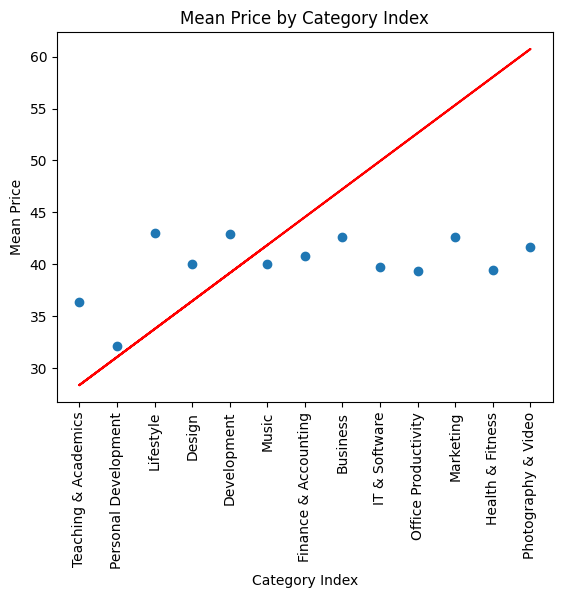

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the courses by category index and compute the mean price
mean_prices = courses_indexed.groupBy("category_index").mean("price")

# Convert the PySpark DataFrame to a Pandas DataFrame
mean_prices_pd = mean_prices.toPandas()
courses_indexed_pd = courses_indexed.toPandas()

# Create a scatter plot of the mean price and category index for each category
plt.scatter(mean_prices_pd["category_index"], mean_prices_pd["avg(price)"])
plt.xlabel("Category Index")
plt.ylabel("Mean Price")
plt.title("Mean Price by Category Index")

# Show the category names as labels on the x-axis
category_names = courses_indexed.select("category", "category_index").distinct().orderBy("category_index")
category_names_pd = category_names.toPandas()
plt.xticks(mean_prices_pd["category_index"], category_names_pd["category"], rotation=90)

# Draw the correlation line
mean_x = courses_indexed_pd["category_index"].mean()
mean_y = courses_indexed_pd["price"].mean()
slope = correlation * np.std(courses_indexed_pd["price"]) / np.std(courses_indexed_pd["category_index"])
intercept = mean_y - slope * mean_x
plt.plot(courses_indexed_pd["category_index"], slope * courses_indexed_pd["category_index"] + intercept, color="red")

plt.show()


To identify the correlation between language and the number of learners

In [ ]:


# Encode the language variable using StringIndexer
indexer = StringIndexer(inputCol="language", outputCol="language_index")
courses_indexed = indexer.fit(courses).transform(courses)

# Compute the correlation between language_index and num_subscribers
correlation = courses_indexed.select(corr("language_index", "num_subscribers")).collect()[0][0]

print("Correlation between language and num_subscribers:", correlation)


Correlation between language and num_subscribers: -0.09406448469687356


Identify the corelation between numerical variables and price

In [ ]:
from pyspark.sql.functions import col

numeric_df = courses.select(
    col("price").cast("double"),
    col("num_subscribers").cast("double"),
    col("avg_rating").cast("double"),
    col("num_reviews").cast("double"),
    col("num_comments").cast("double"),
    col("num_lectures").cast("double"),
    col("content_length_min").cast("double"),
    col("courseage_from_lastupdate").cast("double")

)


In [ ]:
from pyspark.sql.functions import corr

corr_matrix = numeric_df.select(
    corr("price", "price").alias("price"),
    corr("price", "num_subscribers").alias("num_subscribers"),
    corr("price", "avg_rating").alias("avg_rating"),
    corr("price", "num_reviews").alias("num_reviews"),
    corr("price", "num_comments").alias("num_comments"),
    corr("price", "num_lectures").alias("num_lectures"),
    corr("price", "content_length_min").alias("content_length_min"),
    corr("price", "courseage_from_lastupdate").alias("courseage_from_lastupdate")
).show()


+-----+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------------+
|price|    num_subscribers|          avg_rating|        num_reviews|       num_comments|       num_lectures| content_length_min|courseage_from_lastupdate|
+-----+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------------+
|  1.0|-0.1709357913047632|0.038420703106044556|0.01936027027460053|0.08542354289931231|0.19215757901182706|0.24046538687784957|     0.053529190584791386|
+-----+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------------+



Timeseries trend analysis

In [ ]:
# spark, courses
from pyspark.sql.functions import year, month, dayofmonth, sum
from pyspark.sql.window import Window
import matplotlib.pyplot as plt


In [ ]:
time_data=courses.alias('time_data')

In [ ]:
# Convert the "last_update_date" column to a date type and extract year and month
time_data = time_data.withColumn("last_update_date", time_data["last_update_date"].cast("date"))
time_data = time_data.withColumn("update_year", year("last_update_date"))
time_data = time_data.withColumn("update_month", month("last_update_date"))


In [ ]:
# Group the courses by year and month and count the number of subscribers
window = Window.partitionBy("update_year", "update_month").orderBy("last_update_date")
time_data = time_data.withColumn("num_subscribers_monthly", sum("num_subscribers").over(window))


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

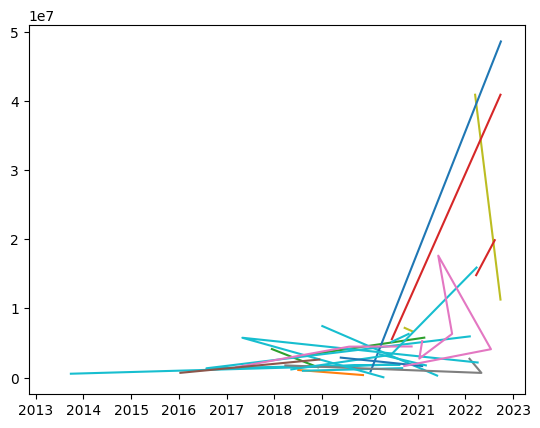

In [ ]:
# Plot the time series of subscribers by month and title
for title in time_data.select("title").distinct().rdd.flatMap(lambda x: x).collect():
    title_df = time_data.filter(time_data.title == title)
    plt.plot(title_df.select("last_update_date").rdd.flatMap(lambda x: x).collect(),
             title_df.select("num_subscribers_monthly").rdd.flatMap(lambda x: x).collect(),
             label=title)

Predict the determinants of course prices

In [ ]:
courses.printSchema()

root
 |-- title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: float (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: float (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: float (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: date (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- last_update_year: integer (nullable = true)
 |-- last_update_month: integer (nullable = true)
 |-- published_year: integer (nullable = true)
 |-- published_month: integer (nullable = true)
 |-- courseage_from_lastupdate: integer (nullable = true)



In [ ]:
data_transformed = courses.alias('data_transformed')


In [ ]:
# Import necessary libraries
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

from pyspark.sql.functions import col



In [ ]:
data_transformed.show()

+--------------------+-------+------+--------------------+---------------+------------------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+----------------+-----------------+--------------+---------------+-------------------------+
|               title|is_paid| price|            headline|num_subscribers|        avg_rating|num_reviews|num_comments|num_lectures|content_length_min|     published_time|last_update_date|            category|         subcategory|               topic|language|     instructor_name|last_update_year|last_update_month|published_year|published_month|courseage_from_lastupdate|
+--------------------+-------+------+--------------------+---------------+------------------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+--------------------+----

In [ ]:
data_transformed = data_transformed.dropna()

In [ ]:
data_transformed.show()

+--------------------+-------+------+--------------------+---------------+------------------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+--------------------+--------+--------------------+----------------+-----------------+--------------+---------------+-------------------------+
|               title|is_paid| price|            headline|num_subscribers|        avg_rating|num_reviews|num_comments|num_lectures|content_length_min|     published_time|last_update_date|            category|         subcategory|               topic|language|     instructor_name|last_update_year|last_update_month|published_year|published_month|courseage_from_lastupdate|
+--------------------+-------+------+--------------------+---------------+------------------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+--------------------+----

In [ ]:
# Drop columns
data_transformed = data_transformed.drop("last_update_date","published_time" ,"instructor_name","topic","subcategory","headline","is_paid","title","category","language")

# Show the first few rows of the DataFrame with the dropped columns
data_transformed.show()


+------+---------------+------------------+-----------+------------+------------+------------------+--------------------+--------+----------------+-----------------+--------------+---------------+-------------------------+
| price|num_subscribers|        avg_rating|num_reviews|num_comments|num_lectures|content_length_min|            category|language|last_update_year|last_update_month|published_year|published_month|courseage_from_lastupdate|
+------+---------------+------------------+-----------+------------+------------+------------------+--------------------+--------+----------------+-----------------+--------------+---------------+-------------------------+
| 19.99|            587| 4.550000190734863|         15|           8|          24|                77|    Health & Fitness| English|            2014|                6|          2013|              5|                        9|
| 44.99|            187| 3.700000047683716|         27|          14|          15|               117|        

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder



Find course age

In [ ]:
from pyspark.sql.functions import year, current_date, datediff

current_year = year(current_date())
# Calculate the age of the course
data_transformed = data_transformed.withColumn('course_age', current_year - col('published_year'))


In [ ]:
correlation = data_transformed.select(corr('course_age', 'price')).collect()[0][0]
print("Correlation between course age and price:", correlation)

Correlation between course age and price: 0.09105987993166068


In [ ]:
data_transformed.show()

+------+---------------+------------------+-----------+------------+------------+------------------+----------------+-----------------+--------------+---------------+-------------------------+----------+
| price|num_subscribers|        avg_rating|num_reviews|num_comments|num_lectures|content_length_min|last_update_year|last_update_month|published_year|published_month|courseage_from_lastupdate|course_age|
+------+---------------+------------------+-----------+------------+------------+------------------+----------------+-----------------+--------------+---------------+-------------------------+----------+
| 19.99|            587| 4.550000190734863|         15|           8|          24|                77|            2014|                6|          2013|              5|                        9|        10|
| 44.99|            187| 3.700000047683716|         27|          14|          15|               117|            2014|                5|          2013|              7|                  

In [ ]:
data_transformed.printSchema()

root
 |-- price: float (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: integer (nullable = true)
 |-- last_update_year: integer (nullable = true)
 |-- last_update_month: integer (nullable = true)
 |-- published_year: integer (nullable = true)
 |-- published_month: integer (nullable = true)
 |-- courseage_from_lastupdate: integer (nullable = true)
 |-- course_age: integer (nullable = true)



In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import RegressionEvaluator


# Split data into training and test sets
train_data, test_data = data_transformed.randomSplit([0.8, 0.2], seed=42)

# Define feature columns and target column
feature_cols = [c for c in data_transformed.columns if c != 'price']
target_col = 'price'

# Create vector assembler to combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Transform the data to include the feature vector column
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Fit a PCA transformer to the training data to select the top 5 principal components
pca = PCA(k=5, inputCol='features', outputCol='pca_features')
pca_model = pca.fit(train_data)
train_data_pca = pca_model.transform(train_data)
test_data_pca = pca_model.transform(test_data)

# Train a regularized linear regression model on the PCA-transformed training data
lr = LinearRegression(featuresCol='pca_features', labelCol=target_col, elasticNetParam=1, regParam=0.1)
model = lr.fit(train_data_pca)

# Make predictions on the test data using the trained model
predictions = model.transform(test_data_pca)

# Evaluate the performance of the model using metrics such as mean squared error (MSE) and R-squared
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
print('Mean squared error:', mse)

evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)
print('R-squared:', r2)


Mean squared error: 1250.789301139374
R-squared: 0.08767156306345025


In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Split data into training and test sets
train_data, test_data = data_transformed.randomSplit([0.8, 0.2], seed=42)

# Define feature columns and target column
feature_cols = [c for c in data_transformed.columns if c != 'price']
target_col = 'price'

# Create vector assembler to combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Transform the data to include the feature vector column
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Train a regularized linear regression model on the training data
lr = LinearRegression(featuresCol='features', labelCol=target_col, elasticNetParam=1, regParam=0.1)
model = lr.fit(train_data)

# Make predictions on the test data using the trained model
predictions = model.transform(test_data)

# Evaluate the performance of the model using metrics such as mean squared error (MSE) and R-squared
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
print('Mean squared error:', mse)

evaluator = RegressionEvaluator(labelCol=target_col, predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)
print('R-squared:', r2)


Mean squared error: 1233.2010890486824
R-squared: 0.10050044321983809


Train2

In [ ]:
data2 = courses.alias('data')

In [ ]:
data2.printSchema()

root
 |-- title: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: float (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: float (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: float (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: date (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- last_update_year: integer (nullable = true)
 |-- last_update_month: integer (nullable = true)
 |-- published_year: integer (nullable = true)
 |-- published_month: integer (nullable = true)
 |-- courseage_from_lastupdate: integer (nullable = true)



In [ ]:


# filter rows with is_paid=False and invert the condition to keep only is_paid=True
data2 = data2.filter(~(col("is_paid") == False))


In [ ]:
data2.show()

+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+----------+--------------------+----------------+-----------------+--------------+---------------+-------------------------+
|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|            category|         subcategory|               topic|  language|     instructor_name|last_update_year|last_update_month|published_year|published_month|courseage_from_lastupdate|
+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+--------------------+--------------------+--------------------+----------+----------

In [ ]:
# Create a temporary view for the data2 dataframe
data2.createOrReplaceTempView("data2_view")

# Use SQL to select the relevant attributes and filter out null values
data = spark.sql("SELECT content_length_min, category, subcategory, price FROM data2_view WHERE content_length_min IS NOT NULL AND category IS NOT NULL AND subcategory IS NOT NULL AND price IS NOT NULL")

# Create a StringIndexer to convert the categorical attributes to numerical values
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(data) for col in ["category", "subcategory"]]
indexer_pipeline = Pipeline(stages=indexers)
data = indexer_pipeline.fit(data).transform(data)

# Create a OneHotEncoder to convert the indexed categorical attributes to binary vectors
from pyspark.ml.feature import OneHotEncoder

encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in ["category", "subcategory"]]
encoder_pipeline = Pipeline(stages=encoders)
data = encoder_pipeline.fit(data).transform(data)

# Combine the binary vectors and the content length attribute into a feature vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["category_vec", "subcategory_vec", "content_length_min"], outputCol="features")
data = assembler.transform(data)

# Split the data into training and test sets
training_data, test_data = data.randomSplit([0.8, 0.2])

# Train a linear regression model on the training data
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="price")
model = lr.fit(training_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the performance of the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error: {:.2f}".format(rmse))


Root Mean Squared Error: 35.33


In [ ]:
# Select 10 rows from the test data and print the actual and predicted price values
predictions.select("price", "prediction").show(10)


+-----+------------------+
|price|        prediction|
+-----+------------------+
|19.99| 43.39627534545789|
|19.99| 43.39627534545789|
|49.99|  39.8919473217485|
|19.99| 42.68149688666379|
|39.99| 42.68149688666379|
|49.99| 48.40338819253603|
|19.99|40.142445664751115|
|19.99|40.142445664751115|
|24.99|40.142445664751115|
|39.99|40.142445664751115|
+-----+------------------+
only showing top 10 rows



In [ ]:
# Create a temporary view for the data2 dataframe
data2.createOrReplaceTempView("data2_view")

# Use SQL to group the data by price ranges and count the number of courses in each range
price_ranges = spark.sql("""
    SELECT
        CASE
            WHEN price < 10 THEN "0-9.99"
            WHEN price < 20 THEN "10-19.99"
            WHEN price < 30 THEN "20-29.99"
            WHEN price < 40 THEN "30-39.99"
            WHEN price < 50 THEN "40-49.99"
            WHEN price < 60 THEN "50-59.99"
            WHEN price < 70 THEN "60-69.99"
            WHEN price < 80 THEN "70-79.99"
            WHEN price < 90 THEN "80-89.99"
            WHEN price < 100 THEN "90-99.99"
            ELSE "100+"
        END AS price_range,
        COUNT(*) AS num_courses
    FROM data2_view
    WHERE is_paid = true
    GROUP BY price_range
    ORDER BY price_range
""")

# Show the result
price_ranges.show()


+-----------+-----------+
|price_range|num_courses|
+-----------+-----------+
|     0-9.99|       5410|
|   10-19.99|      22873|
|       100+|       4972|
|   20-29.99|      12426|
|   30-39.99|       5726|
|   40-49.99|       5850|
|   50-59.99|       2241|
|   60-69.99|       1467|
|   70-79.99|       5841|
|   80-89.99|       1832|
|   90-99.99|       5390|
+-----------+-----------+



From the given dataset, discounted and undiscounted course details are not given.

In [ ]:
# Filter the data2 dataframe to get courses with prices above 50 and below 200
data_above_30 = data2.filter((data2.price >50) & (data2.price < 200))




In [ ]:
# Create a temporary view for the data_above_30 dataframe
data_above_30.createOrReplaceTempView("data_above_30_view")

# Use SQL to select the relevant attributes and filter out null values
data = spark.sql("SELECT content_length_min, category, subcategory, price FROM data_above_30_view WHERE content_length_min IS NOT NULL AND category IS NOT NULL AND subcategory IS NOT NULL AND price IS NOT NULL")

# Create a StringIndexer to convert the categorical attributes to numerical values
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(data) for col in ["category", "subcategory"]]
indexer_pipeline = Pipeline(stages=indexers)
data = indexer_pipeline.fit(data).transform(data)

# Create a OneHotEncoder to convert the indexed categorical attributes to binary vectors
from pyspark.ml.feature import OneHotEncoder

encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in ["category", "subcategory"]]
encoder_pipeline = Pipeline(stages=encoders)
data = encoder_pipeline.fit(data).transform(data)

# Combine the binary vectors and the content length attribute into a feature vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["category_vec", "subcategory_vec", "content_length_min"], outputCol="features")
data = assembler.transform(data)

# Split the data into training and test sets
training_data, test_data = data.randomSplit([0.8, 0.2])

# Train a linear regression model on the training data
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="price")
model = lr.fit(training_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the performance of the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error: {:.2f}".format(rmse))


Root Mean Squared Error: 25.59


In [ ]:
# Select 10 rows from the test data and print the actual and predicted price values
predictions.select("category", "subcategory","price", "prediction").show(50)


+--------------------+--------------------+------+-----------------+
|            category|         subcategory| price|       prediction|
+--------------------+--------------------+------+-----------------+
|            Business|          Management| 69.99|93.65854228815377|
|            Business|          Operations| 79.99|90.83018083278021|
|            Business|  Project Management| 59.99|91.21883550738207|
|            Business|  Project Management| 79.99|91.21883550738207|
|            Business|  Project Management| 89.99|91.21883550738207|
|            Business|  Project Management| 94.99|91.21883550738207|
|            Business|  Project Management|149.99|91.21883550738207|
|         Development|        Data Science| 59.99|98.39826804098605|
|         Development|Programming Langu...| 69.99|96.65691406485327|
|Finance & Accounting| Investing & Trading|  79.9| 93.9251468502732|
|       IT & Software|   IT Certifications| 54.99|94.35255450596932|
|       IT & Software|   IT Certif

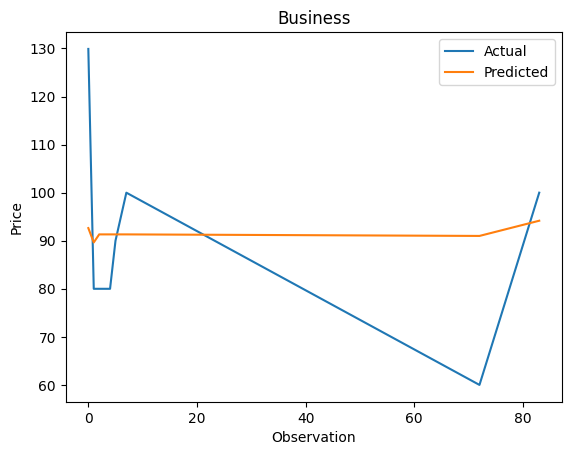

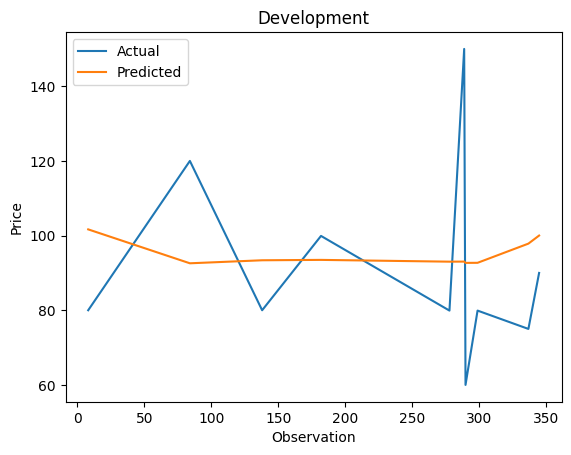

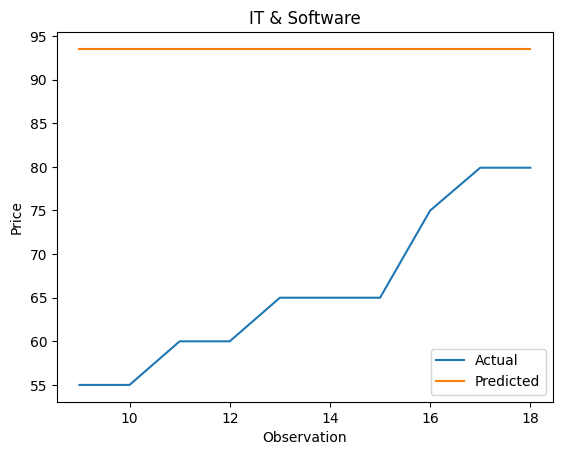

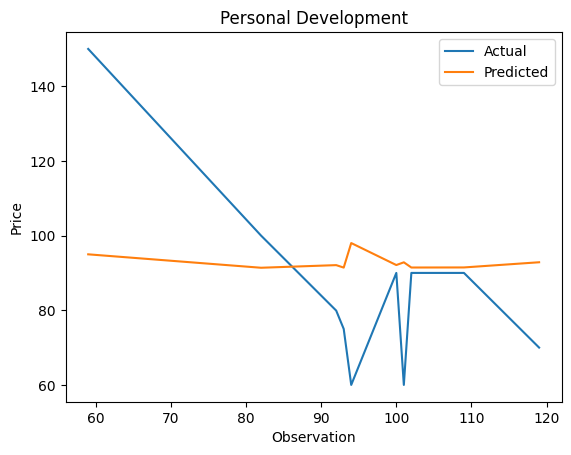

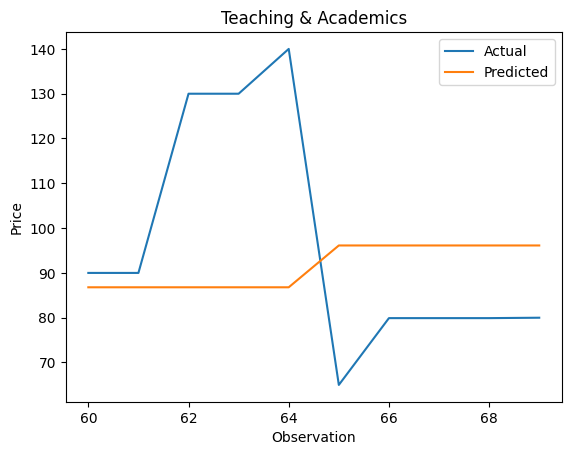

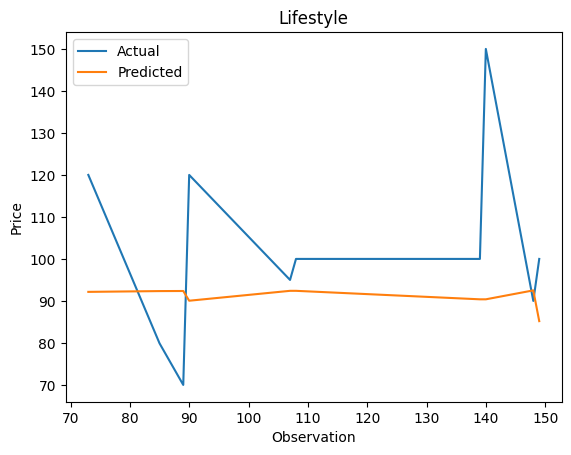

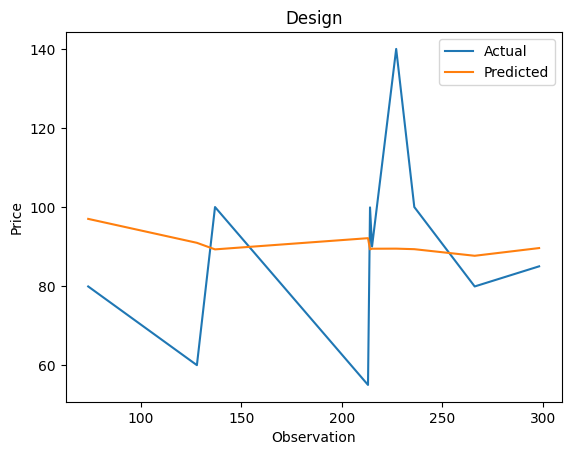

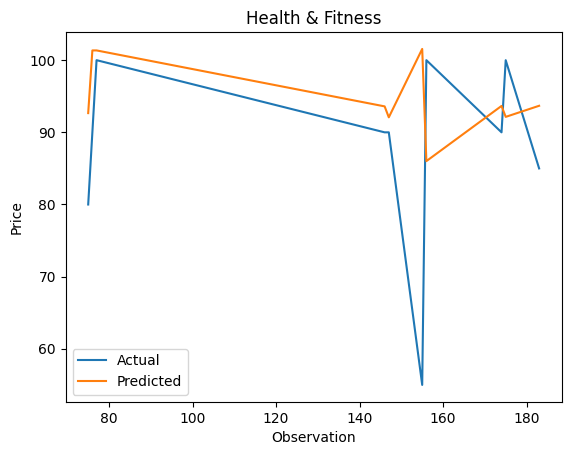

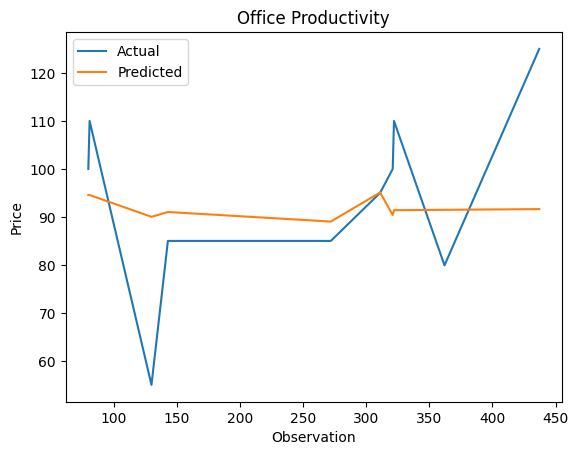

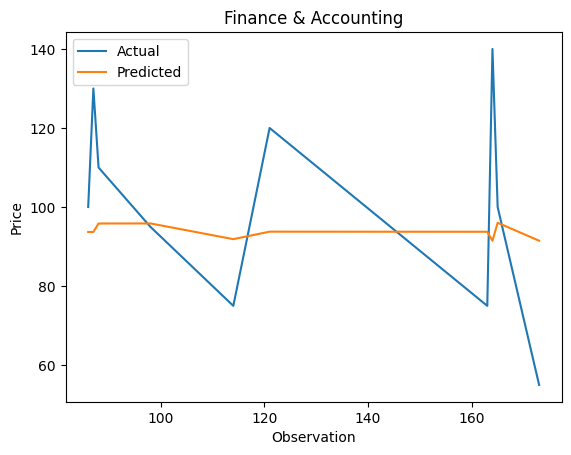

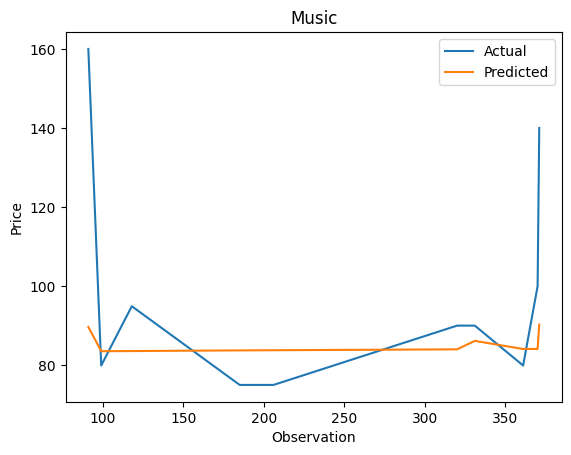

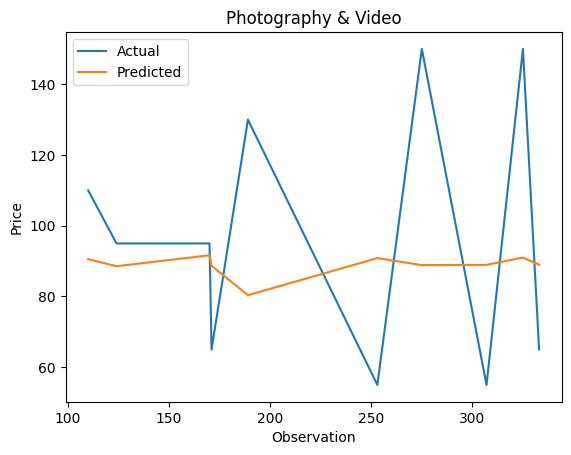

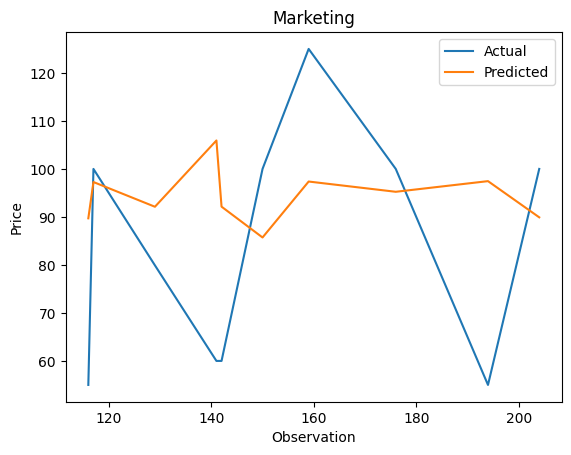

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Make predictions on the test data
predictions = model.transform(test_data)

# Convert the Spark DataFrame to a Pandas DataFrame for plotting
predictions_pd = predictions.select(["price", "prediction", "category"]).toPandas()

# Iterate through each category and create a plot
categories = predictions_pd["category"].unique()

for category in categories:
    # Filter the predictions for the current category
    category_predictions = predictions_pd[predictions_pd["category"] == category]

    # Plot the first 10 actual and predicted values
    fig, ax = plt.subplots()
    ax.plot(category_predictions["price"][:10], label="Actual")
    ax.plot(category_predictions["prediction"][:10], label="Predicted")
    ax.set_xlabel("Observation")
    ax.set_ylabel("Price")
    ax.set_title(category)
    ax.legend()

    # Show the plot
    plt.show()


Using Random forest

In [ ]:
# Import necessary libraries
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a temporary view for the data_above_30 dataframe
data_above_30.createOrReplaceTempView("data_above_30_view")

# Use SQL to select the relevant attributes and filter out null values
data = spark.sql("SELECT content_length_min, category, subcategory, price FROM data_above_30_view WHERE content_length_min IS NOT NULL AND category IS NOT NULL AND subcategory IS NOT NULL AND price IS NOT NULL")

# Create a StringIndexer to convert the categorical attributes to numerical values
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(data) for col in ["category", "subcategory"]]
indexer_pipeline = Pipeline(stages=indexers)
data = indexer_pipeline.fit(data).transform(data)

# Create a OneHotEncoder to convert the indexed categorical attributes to binary vectors
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in ["category", "subcategory"]]
encoder_pipeline = Pipeline(stages=encoders)
data = encoder_pipeline.fit(data).transform(data)

# Combine the binary vectors and the content length attribute into a feature vector
assembler = VectorAssembler(inputCols=["category_vec", "subcategory_vec", "content_length_min"], outputCol="features")
data = assembler.transform(data)

# Split the data into training and test sets
training_data, test_data = data.randomSplit([0.8, 0.2])

# Train a Random Forest regression model on the training data
rf = RandomForestRegressor(featuresCol="features", labelCol="price")
model = rf.fit(training_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the performance of the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error: {:.2f}".format(rmse))


Root Mean Squared Error: 25.51
